<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/sem_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Семинар 13: спецификация модели, тесты на выбор функциональной формы**

In [3]:
import numpy as np
import pandas as pd # чтение файлов
import seaborn as sns # построение графиков
import statsmodels.api as sm # тесты
import statsmodels.formula.api as smf
import statsmodels
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import scipy.stats
import math
from scipy.stats import chi2

In [17]:
# Импортируем данные о квартирах в Москве
d = pd.read_excel('dataflats.xlsx')
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,1,81.0,58,40,6.0,12.5,7,1,1,1
1,2,75.0,44,28,6.0,13.5,7,1,0,1
2,3,128.0,70,42,6.0,14.5,3,1,1,1
3,4,95.0,61,37,6.0,13.5,7,1,0,1
4,5,330.0,104,60,11.0,10.5,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1


In [18]:
# Удалим строки, в которых есть пропуск хотя бы для одного столбца
d.dropna(inplace=True)
# Добавим в набор данных новую переменную price_sq (стоимость 1 кв м квартиры в Москве)
d['price_sq'] = d['price']/d['totsp']
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368


In [ ]:
# Построим графики зависимостей стоимости 1 кв м квартиры от различных факторов
sns.pairplot(d, x_vars = ["totsp", "livesp", "kitsp", "dist", "metrdist"], y_vars = ["price_sq"])

In [54]:
# Оценим начальную модель регрессии для стоимости 1 кв.м.
model_0 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist', data = d).fit()
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     188.2
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          5.61e-165
Time:                        19:03:33   Log-Likelihood:                -663.01
No. Observations:                2038   AIC:                             1338.
Df Residuals:                    2032   BIC:                             1372.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6694      0.058     28.765      0.0

In [55]:
# Сохраним прогнозные значения
d['price_sq_hat'] = model_0.predict()
# и остатки модели
d['resid'] = model_0.resid
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,price_sq_hat,resid,ln_price_sq,lin,log,y_new,ln_y_new,price_sq_hat_3,resid_3
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552,1.548475,-0.151923,0.334006,0.010897,0.018152,0.831423,-0.184616,1.674858,-0.278306
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545,1.374219,0.330327,0.533298,-0.035919,-0.052240,1.014784,0.014676,1.428422,0.276123
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571,1.510005,0.318567,0.603535,0.008646,0.014234,1.088622,0.084912,1.653473,0.175099
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377,1.447796,0.109581,0.443003,-0.016327,-0.024450,0.927169,-0.075620,1.485337,0.072040
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077,1.911328,1.261749,1.154702,0.047823,0.087696,1.889060,0.636079,1.877973,1.295104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571,1.720971,-0.292400,0.356675,0.015746,0.025216,0.850486,-0.161948,1.614013,-0.185441
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333,1.776390,-0.193056,0.459532,0.014785,0.023842,0.942622,-0.059090,1.624485,-0.041152
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333,1.725855,-0.142522,0.459532,0.019270,0.032485,0.942622,-0.059090,1.702022,-0.118688
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368,1.746840,-0.049472,0.529079,0.023256,0.037526,1.010511,0.010456,1.632444,0.064925


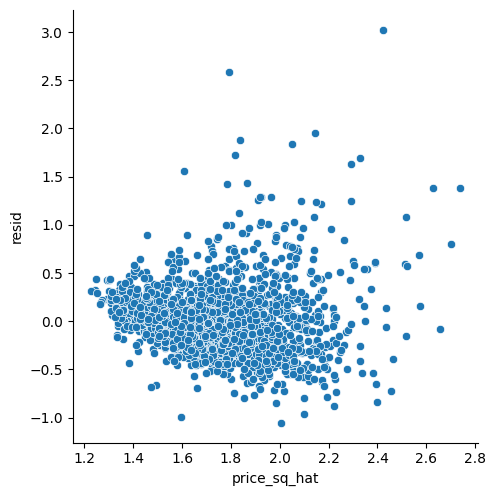

In [39]:
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(d, x_vars=['price_sq_hat'], y_vars=["resid"], height = 5)

По приведенному выше графику можно проанализировать наличие двух проблем:


*   неверная спецификация модели (средний уровень остатков зависит от прогнозных
значений, разброс остатков также может зависеть
от прогнозов, хотя это не обязательно);
*   гетероскедастичность (разброс остатков зависит от
прогнозных значений, но средний уровень остатков
во всех частях графика примерно равен нулю).



In [60]:
# Способ корректировки гетероскедастичности - использование робастных оценок в форме Уайта.
model_robust = model_0.get_robustcov_results(cov_type = 'HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     115.0
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          2.73e-107
Time:                        19:08:08   Log-Likelihood:                -663.01
No. Observations:                2038   AIC:                             1338.
Df Residuals:                    2032   BIC:                             1372.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6694      0.111     15.036      0.0

Заметим, что после переоценивания модели с робастными стандартными ошибками оценка коэффициента при переменной $totsp$ перестала быть значимой.

**Тест Рамсея для модели регрессии (RESET тест)**

$H_0$: нет пропущенных переменных

$H_1$: есть пропущенные переменные

In [65]:
reset = oi.reset_ramsey(model_0, degree = 2)

print(f"F-статистика: {reset.fvalue:.4f}")
print(f"p-value: {reset.pvalue:.4f}")

F-статистика: 91.8500
p-value: 0.0000


Так как $p-value$ в тесте Рамеся равен 0, гипотеза H1 не отвергается, то есть в модели есть пропущенные переменные.

**J-тест для невложенных моделей**

In [42]:
from statsmodels.stats.diagnostic import compare_j

model_1 = smf.ols('price_sq ~ livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()
model_2 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + brick', data = d).fit()

# Модель 1 vs Модель 2 (к исходной модели 1 добавляются прогнозные значения модели 2 как дополнительная переменная)
result_12 = compare_j(model_1, model_2)
print(f"F-статистика: {result_12[0]:.4f}")
print(f"p-value:      {result_12[1]:.4f}")

# Модель 2 vs Модель 1 (к исходной модели 2 добавляются прогнозные значения модели 1 как дополнительная переменная)
result_21 = compare_j(model_2, model_1)
print(f"F-статистика: {result_21[0]:.4f}")
print(f"p-value:      {result_21[1]:.4f}")

F-статистика: 8.1464
p-value:      0.0000
F-статистика: 2.0470
p-value:      0.0408


Коэффициенты при дополнительных регрессорах в обеих моделях оказались значимы на 5% уровне значимости. Однако, можно заметить, что на 1% уровне значимости коэффициент при доп. регрессоре в модели 2 оказался незначим. Таким образом, есть основание полагать, что модель 2 лучше соответствует данным по сравнению с моделью 1.

In [46]:
model_3 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.61e-187
Time:                        18:57:06   Log-Likelihood:                -607.05
No. Observations:                2038   AIC:                             1230.
Df Residuals:                    2030   BIC:                             1275.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5209      0.058     26.082      0.0

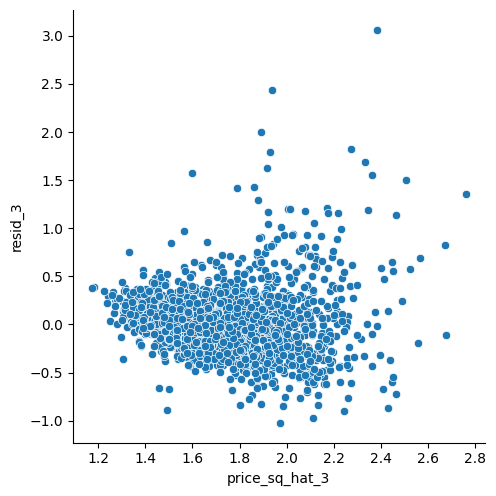

In [47]:
# Сохраним прогнозные значения
d['price_sq_hat_3'] = model_3.predict()
# Сохраним остатки модели
d['resid_3'] = model_3.resid
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(d, x_vars=['price_sq_hat_3'], y_vars=["resid_3"], height = 5)

**PE тест МакКиннона, Уайта и Дэвидсона (1983)**

Рассмотрим PE-тест для сравнения линейной и полулогарифмической моделей:

1) Оцениваем линейную и полулогарифмическую (или логарифмическую) модель регрессии:
    $$Y = X \beta + \varepsilon,$$
    $$\log Y = X \beta + \varepsilon.$$

2) Оценим вспомогательные регрессии $$Y = X \beta + \delta_{LIN} \left(\log \widehat{Y} - \widehat{\log Y} \right) + \varepsilon,$$
$$\log Y = X \beta + \delta_{LOG} \left(\widehat{Y} - \exp (\widehat{\log Y}) \right) + \varepsilon.$$

3) Проверим гипотезы $H_0$: $\delta_{LIN} = 0$ и $H_0'$: $\delta_{LOG} = 0$.

In [49]:
# PE-тест Дэвидсона-Маккинона (выбор между линейной и полулогарифмической (или линейной в логарифмах) моделями
d['ln_price_sq'] = np.log(d['price_sq'])
model_lin = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()
model_log = smf.ols('ln_price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()

# Вспомогательные регрессии
d['lin'] = np.log(model_lin.fittedvalues) - model_log.fittedvalues
d['log'] = model_lin.fittedvalues - np.exp(model_log.fittedvalues)

model_lin_add = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick + lin', data = d).fit()
model_log_add = smf.ols('ln_price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick + log', data = d).fit()

print(model_lin_add.summary())
print(model_log_add.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          1.67e-205
Time:                        18:58:41   Log-Likelihood:                -560.96
No. Observations:                2038   AIC:                             1140.
Df Residuals:                    2029   BIC:                             1190.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2400      0.064     19.386      0.0

In [30]:
# Метод Зарембки (частный случай преобразования Бокса-Кокса): выбор между линейной и полулогарифмической моделями
# H0: качество подгонки линейной и полулогарифмической моделей одинаковое
# H1: модель с меньшей RSS лучше
g_price_sq = math.exp(np.mean(np.log(d['price_sq']))) # геометрическое среднее
print("Геометрическое среднее =", g_price_sq)
g_price_sq # геометрическое среднее (автоматически)

d['y_new'] = d['price_sq']/g_price_sq
d['ln_y_new'] = np.log(d['y_new'])

model1 = smf.ols('y_new ~ totsp + livesp + kitsp + dist + metrdist', data=d).fit()
model2 = smf.ols('ln_y_new ~ totsp + livesp + kitsp + dist + metrdist', data=d).fit()

xi_2 = 2038/2*abs(np.log(model1.ssr/model2.ssr)) # значение тестовой статистики
print("Наблюдаемое значение статистики =", xi_2)
xi_crit = chi2.ppf(0.95, 1) # критическое значение
print("Критическое значение статистики =",xi_crit)

# Так как наблюдаемое значение статистики больше критического, то на 5% уровне мы не можем отвергнуть гипотезу H1,
# то есть модели имеют разное качество подгонки

# Выбор модели производится бы на основе RSS (чем RSS меньше, тем лучше)
print("RSS для model_1 =", model1.ssr) # RSS для линейной модели
print("RSS для model_2 =", model2.ssr) # RSS для полулогарифмической модели (оказалась лучше)

Геометрическое среднее = 1.6797124547371594
Наблюдаемое значение статистики = 333.0126944343583
Критическое значение статистики = 3.841458820694124
RSS для model_1 = 81.06498820522353
RSS для model_2 = 58.466136724641295


**Проверка нормальности остатков модели**

In [53]:
# Тестирование нормальности остатков модели с помощью теста Харке-Бера

# H0: остатки имеют нормальное распределение
# H1: распределение остатков отлично от нормального

from scipy import stats
jb_test = stats.jarque_bera(model_3.resid)
# Выводим результаты
print(f"JB статистика: {jb_test.statistic}")
print(f"p-value: {jb_test.pvalue}")
# так как p-value < 0.05, то гипотеза H1 не отвергается на любом разумном уровне значимости,
# то есть остатки линейной модели нельзя считать нормальными

JB статистика: 7844.432881598333
p-value: 0.0
